# PIZZA SALES ANALYSIS

<p style="font-size:20px; font-weight:500;">Student Name - Pooja Banode</p>

<p style="font-size:20px; font-weight:500;">Trainer Name - Rajshri Thete</p>

# INTRODUCTION

The pizza industry has witnessed significant growth in recent years, driven by changing consumer preferences and increased demand for diverse food options. This project analyzes the sales data of a pizza restaurant, focusing on various aspects such as total orders, revenue generation by pizza type, and customer preferences based on size and category. Utilizing SQL queries, data visualization techniques, and insights drawn from the analysis, the study aims to provide a comprehensive overview of the restaurant's performance and identify opportunities for improvement.

# OBJECTIVES

The main objectives of this analysis are:

1) Total Orders Overview: To determine the total number of orders placed and analyze trends in customer purchasing behavior.
   
2) Revenue Analysis: To calculate total revenue generated by each pizza type and identify top-performing and underperforming products.

3) Price Analysis: To identify the highest-priced pizza and analyze the price distribution across various offerings.
 
4) Size Preferences: To investigate customer preferences for pizza sizes and their implications on marketing strategies.

5) Top Products Identification: To identify the top 5 most ordered pizza types and assess their impact on overall sales.

6) Category Insights: To analyze the distribution of orders across different pizza categories and explore customer preferences.

7) Time-based Demand Analysis: To determine peak hours of operation and evaluate daily sales patterns, helping in resource allocation and promotional strategies.

# Importing Libraries for Data Analysis and Visualization

In [38]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p style="font-size:18px"><b>Insights:</b> Imports the following libraries for data processing, database interaction, and visualization.</p>

# Connecting to the MySQL database

In [39]:
# Establish a connection to the MySQL database
connection = mysql.connector.connect(
user='root',
password='Smart@12345',
host='localhost',
database='pizzahut'
)

<p style="font-size:18px"><b>Insights:</b> connection to a MySQL database named 'pizzahut'</p>

# Creating a Cursor Object for SQL Queries

In [40]:
# Create a cursor object using the established connection
cursor = connection.cursor()

<p style="font-size:18px"><b>Insights:</b> A cursor object is created to execute SQL queries and fetch results from the pizzahut database.</p>

# Exploratory Data Analysis

# Fetching the first 5 rows from the orders table

In [41]:
# Define the SQL query to select all records from the 'orders' table
query = 'SELECT * FROM orders'

# Execute the SQL query and load the results into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
df.head()

C:\Users\91702\AppData\Local\Temp\ipykernel_22664\2952393237.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,order_id,order_date,order_time
0,1,2015-01-01,0 days 11:38:36
1,2,2015-01-01,0 days 11:57:40
2,3,2015-01-01,0 days 12:12:28
3,4,2015-01-01,0 days 12:16:31
4,5,2015-01-01,0 days 12:21:30


<p style="font-size:18px"><b>Insights:</b> All records from the orders table are loaded into a Pandas DataFrame for analysis, with the first few rows displayed using head().</p>

# Fetching the first 5 rows from the order_details table

In [42]:
# Define the SQL query to select all records from the 'order_details' table
query = 'SELECT * FROM order_details'

# Execute the SQL query and load the results into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
df.head()

C:\Users\91702\AppData\Local\Temp\ipykernel_22664\2821333570.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,order_details_id,order_id,pizza_id,quantity
0,1,1,five_cheese_m,1
1,2,2,four_cheese_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_veggie_l,1
4,5,2,mexicana_m,1


<p style="font-size:18px"><b>Insights:</b> All records from the order_details table are loaded into a Pandas DataFrame, with the first few rows shown using head().</p>

# Fetching the first 5 rows from the pizzas table

In [13]:
# Define the SQL query to select all records from the 'pizzas' table
query = 'SELECT * FROM pizzas'

# Execute the SQL query and load the results into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
df.head()

C:\Users\91702\AppData\Local\Temp\ipykernel_22664\3081482729.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,pizza_id,pizza_type_id,size,price
0,artichoke_hearts_s,artichoke_hearts,S,12.50
1,artichoke_spinach_l,artichoke_spinach,L,20.75
2,artichoke_spinach_m,artichoke_spinach,M,16.75
3,artichoke_spinach_s,artichoke_spinach,S,12.75
4,avocado_veggie_s,avocado_veggie,S,12.50


<p style="font-size:18px"><b>Insights:</b> All records from the pizzas table are retrieved and loaded into a Pandas DataFrame, with the first few rows displayed using head().</p>

# Fetching the first 5 rows from the pizza_types table

In [14]:
# Define the SQL query to select all records from the 'pizza_types' table
query = 'SELECT * FROM pizza_types'

# Execute the SQL query and load the results into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
df.head()

C:\Users\91702\AppData\Local\Temp\ipykernel_22664\431742867.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,pizza_type_id,name,category,ingredients
0,artichoke_hearts,The Artichoke Hearts Pizza,Veggie,"Artichokes, Feta Cheese, Sun-dried Tomatoes, O..."
1,artichoke_spinach,The Artichoke and Spinach Pizza,Supreme,"Artichokes, Spinach, Mozzarella, Parmesan, Garlic"
2,avocado_veggie,The Avocado Veggie Pizza,Veggie,"Avocado, Tomatoes, Red Peppers, Spinach, Garlic"
3,balsamic_glaze,The Balsamic Glaze Pizza,Veggie,"Tomatoes, Mozzarella, Basil, Garlic, Balsamic ..."
4,broccolini,The Broccolini Pizza,Supreme,"Broccolini, Ricotta, Mozzarella, Red Chili Fla..."


<p style="font-size:18px"><b>Insights:</b> All records from the pizza_types table are selected and loaded into a Pandas DataFrame, with the first few rows displayed using head().</p>

# Merging Columns from Multiple Tables

In [15]:
query = """
SELECT 
    orders.order_id, 
    orders.order_date, 
    orders.order_time, 
    order_details.order_details_id, 
    order_details.pizza_id, 
    order_details.quantity, 
    pizzas.size, 
    pizzas.price, 
    pizza_types.name AS pizza_name, 
    pizza_types.category, 
    pizza_types.ingredients
FROM orders
JOIN order_details ON orders.order_id = order_details.order_id
JOIN pizzas ON order_details.pizza_id = pizzas.pizza_id
JOIN pizza_types ON pizzas.pizza_type_id = pizza_types.pizza_type_id;
"""

# Execute the query and fetch the data
cursor = connection.cursor()
cursor.execute(query)
result = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Convert to DataFrame
df = pd.DataFrame(result, columns=columns)


# Display the DataFrame
df.head()

,order_id,order_date,order_time,order_details_id,pizza_id,quantity,size,price,pizza_name,category,ingredients
0,1,2015-01-01,0 days 11:38:36,1,five_cheese_m,1,M,16.75,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
1,2,2015-01-01,0 days 11:57:40,2,four_cheese_m,1,M,16.75,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
2,2,2015-01-01,0 days 11:57:40,3,five_cheese_l,1,L,39.75,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,0 days 11:57:40,4,ital_veggie_l,1,L,36.75,The Italian Vegetables Pizza,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ..."
4,2,2015-01-01,0 days 11:57:40,5,mexicana_m,1,M,16.75,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


<p style="font-size:18px"><b>Insights:</b> This SQL query retrieves a detailed view of pizza orders by joining the orders, order_details, pizzas, and pizza_types tables. It provides information such as order ID, date, time, pizza size, price, quantity, pizza name, category, and ingredients. The results are then converted into a Pandas DataFrame for analysis, with the first few rows displayed using head().</p>

# Displaying All Column Names

In [16]:
print("Column names:", df.columns)

Column names: Index(['order_id', 'order_date', 'order_time', 'order_details_id', 'pizza_id',
       'quantity', 'size', 'price', 'pizza_name', 'category', 'ingredients'],
      dtype='object')


<p style="font-size:18px"><b>Insights:</b> df.columns retrieves the names of all columns in the DataFrame, allowing users to verify the structure and available data.</p>

# DATA CLEANING

In [17]:
# Checking for missing values
missing_values = df.isnull().sum()  # Stores the count of missing values in the missing_values variable.
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
order_id            0
order_date          0
order_time          0
order_details_id    0
pizza_id            0
quantity            0
size                0
price               0
pizza_name          0
category            0
ingredients         0
dtype: int64


<p style="font-size:18px"><b>Insights:</b> The code checks for missing values in the DataFrame by using isnull().sum(), which counts the number of missing entries in each column. The results are printed to provide an overview of data completeness.</p>

In [18]:
# Checking data types
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
order_id                      int64
order_date                   object
order_time          timedelta64[ns]
order_details_id              int64
pizza_id                     object
quantity                      int64
size                         object
price                        object
pizza_name                   object
category                     object
ingredients                  object
dtype: object


<p style="font-size:18px"><b>Insights:</b>  The code retrieves the data types of each column in the DataFrame using dtypes, which helps identify the type of data stored (e.g., integers, floats, strings). The results are printed to ensure data types align with expected values for analysis.</p>

In [19]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

<p style="font-size:18px"><b>Insights:</b> The code removes duplicate rows from the DataFrame, ensuring only unique entries remain for accurate analysis.</p>

In [20]:
# Fill or drop missing values if necessary
df.fillna('Unknown', inplace=True)  # Example: Filling missing values

<p style="font-size:18px"><b>Insights:</b> The code fills missing values in the DataFrame with the string 'Unknown', ensuring data completeness and preventing issues during analysis.</p>

In [21]:
df.head()

,order_id,order_date,order_time,order_details_id,pizza_id,quantity,size,price,pizza_name,category,ingredients
0,1,2015-01-01,0 days 11:38:36,1,five_cheese_m,1,M,16.75,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
1,2,2015-01-01,0 days 11:57:40,2,four_cheese_m,1,M,16.75,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
2,2,2015-01-01,0 days 11:57:40,3,five_cheese_l,1,L,39.75,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,0 days 11:57:40,4,ital_veggie_l,1,L,36.75,The Italian Vegetables Pizza,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ..."
4,2,2015-01-01,0 days 11:57:40,5,mexicana_m,1,M,16.75,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


<p style="font-size:18px"><b>Insights:</b> The head() function displays the first few rows of the DataFrame.</p>

In [22]:
# Gives a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          39 non-null     int64          
 1   order_date        39 non-null     object         
 2   order_time        39 non-null     timedelta64[ns]
 3   order_details_id  39 non-null     int64          
 4   pizza_id          39 non-null     object         
 5   quantity          39 non-null     int64          
 6   size              39 non-null     object         
 7   price             39 non-null     object         
 8   pizza_name        39 non-null     object         
 9   category          39 non-null     object         
 10  ingredients       39 non-null     object         
dtypes: int64(3), object(7), timedelta64[ns](1)
memory usage: 3.5+ KB


<p style="font-size:18px"><b>Insights:</b> The info() method provides a summary of the DataFrame, including entry counts, column names, data types, and memory usage, helping assess the dataset's structure.</p>


# VISUALIZATION

# Retrieving the total number of orders placed

# Bar chart for total number of orders


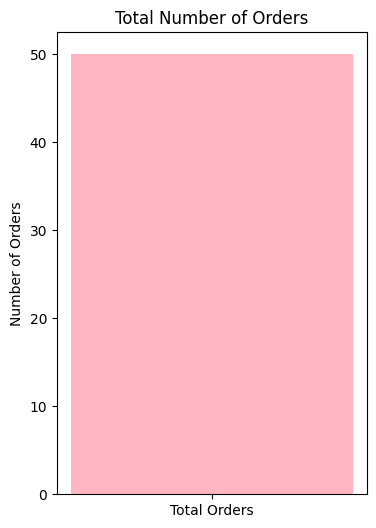

In [23]:
# Execute query to get the total number of orders
cursor.execute("SELECT COUNT(order_id) AS total_orders FROM orders;")
result = cursor.fetchone()

# Extract the total number of orders
total_orders = result[0]

# Set figure size for better layout
plt.figure(figsize=(4, 6))  # Width: 4, Height: 6 (adjust as needed)

# Create a bar chart to visualize the total number of orders
plt.bar(['Total Orders'], [total_orders], color='lightpink')

# Add title and labels
plt.title('Total Number of Orders')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

Total number of orders placed is 50.

Insight: This total indicates the overall volume of transactions that occurred in the pizza shop. Monitoring the number of orders over time can help track business growth.

# Calculating the total revenue generated from pizza sales.

# Pie Chart for Total Revenue per Pizza Type

Total Revenue Generated by Pizza Type:
The Five Cheese Pizza: $188.50
The Four Cheese Pizza: $91.75
The Italian Vegetables Pizza: $260.25
The Mexicana Pizza: $115.75
The Spinach Pesto Pizza: $89.25
The Green Garden Pizza: $105.75
The Vegetables + Vegetables Pizza: $12.75
The Spinach and Feta Pizza: $30.75
The Mediterranean Pizza: $46.25


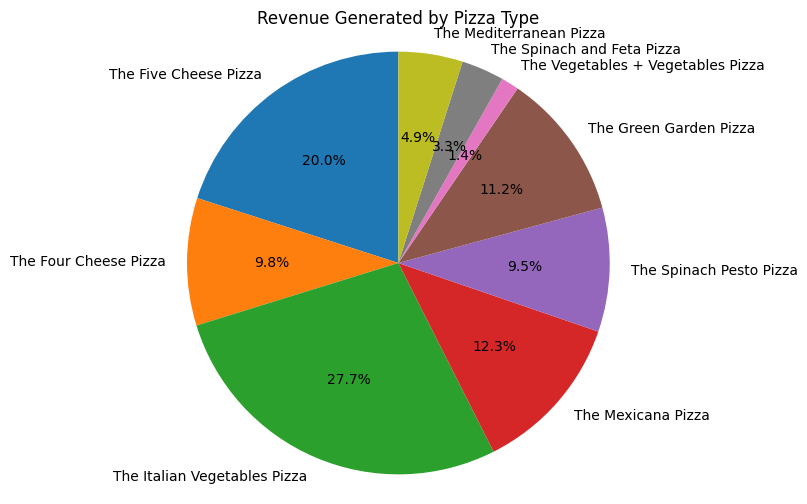

In [24]:
# SQL query to calculate total revenue per pizza type
query_revenue_per_pizza_type = """
    SELECT 
        pizza_types.name, 
        ROUND(SUM(order_details.quantity * pizzas.price), 2) AS total_sales
    FROM 
        order_details
    JOIN 
        pizzas ON pizzas.pizza_id = order_details.pizza_id
    JOIN 
        pizza_types ON pizzas.pizza_type_id = pizza_types.pizza_type_id
    GROUP BY 
        pizza_types.name;
"""

cursor.execute(query_revenue_per_pizza_type)
revenue_data = cursor.fetchall()

# Prepare data for pie chart
pizza_names = [row[0] for row in revenue_data]
total_sales = [row[1] for row in revenue_data]

# Print total revenue for each pizza type
print("Total Revenue Generated by Pizza Type:")
for name, sales in revenue_data:
    print(f"{name}: ${sales:.2f}")

# Pie chart for revenue generated by pizza type
plt.figure(figsize=(6, 6))
plt.pie(total_sales, labels=pizza_names, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Generated by Pizza Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Bar Chart for Identifying the Highest-Priced Pizza

The highest-priced pizza is 'The Five Cheese Pizza' priced at $39.75


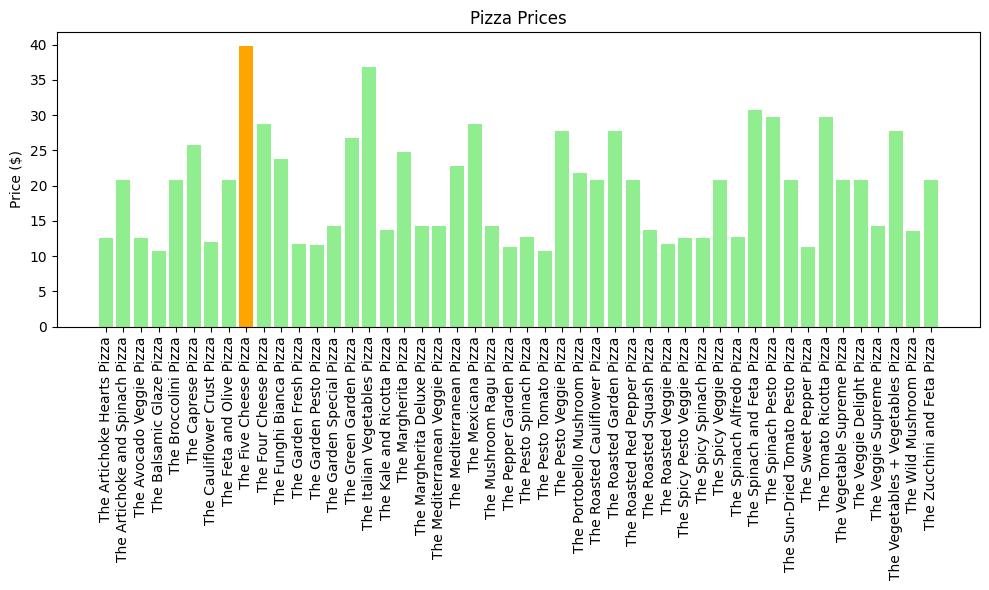

In [25]:
# SQL query to retrieve all pizzas
query_all_pizzas = """
    SELECT 
        pizza_types.name, pizzas.price
    FROM 
        pizza_types
    JOIN
        pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id;
"""


cursor.execute(query_all_pizzas)
all_pizzas = cursor.fetchall()

# Identify the highest-priced pizza
highest_price_pizza = max(all_pizzas, key=lambda x: x[1])
highest_price_pizza_name, highest_price = highest_price_pizza
print(f"The highest-priced pizza is '{highest_price_pizza_name}' priced at ${highest_price:.2f}")

# Prepare data for bar chart
pizza_names = [pizza[0] for pizza in all_pizzas]
pizza_prices = [pizza[1] for pizza in all_pizzas]

# Bar chart for all pizzas
plt.figure(figsize=(10, 6))
colors = ['orange' if pizza[0] == highest_price_pizza_name else 'lightgreen' for pizza in all_pizzas]
plt.bar(pizza_names, pizza_prices, color=colors)
plt.title('Pizza Prices')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Identifying the Count of Orders for Each Pizza Size and Created a Donut Chart

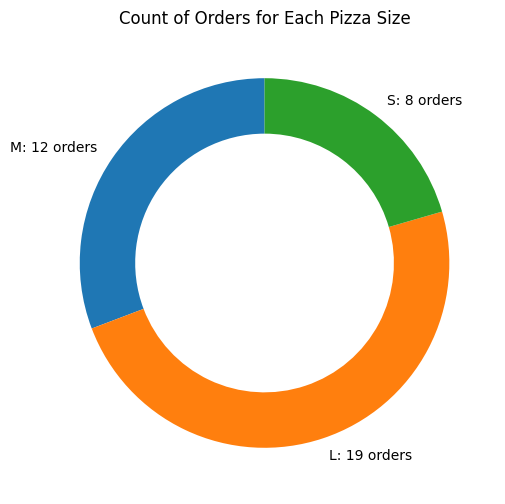

In [26]:
# SQL query to retrieve the count of orders for each pizza size
query_common_pizza_size = """
    SELECT pizzas.size, COUNT(order_details.order_details_id) AS size_count
    FROM pizzas 
    JOIN order_details 
    ON pizzas.pizza_id = order_details.pizza_id
    GROUP BY pizzas.size;
"""

# Execute the query
cursor.execute(query_common_pizza_size)
common_sizes = cursor.fetchall()

# Prepare data for the donut chart
sizes = [size[1] for size in common_sizes]  # Order counts
size_labels = [f'{size[0]}: {size[1]} orders' for size in common_sizes]  # Labels for each size

# Donut chart for all pizza sizes ordered
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=size_labels, startangle=90, wedgeprops=dict(width=0.3))
plt.title('Count of Orders for Each Pizza Size')
plt.show()


Most Common Pizza Sizes Ordered
L Size: The L size has 19 orders, indicating a strong preference for larger pizzas among customers.

# Bar Chart for Top 5 most ordered pizza types along with their quantities.

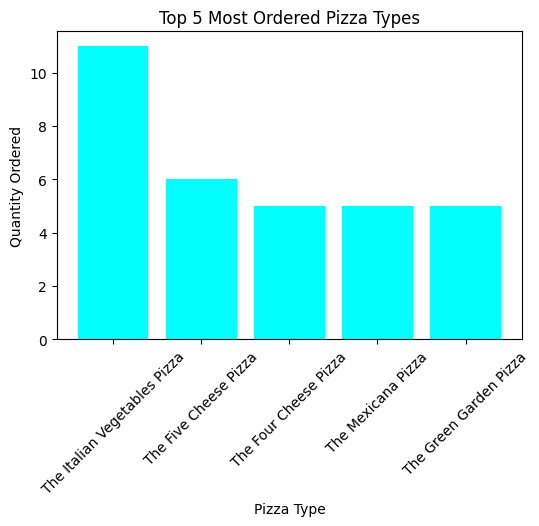

In [27]:
# Execute query to list the top 5 most ordered pizza types
query_top5_pizza_types = """
    SELECT pizza_types.name, SUM(order_details.quantity) AS quantity
    FROM pizza_types
    JOIN pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
    JOIN order_details oN order_details.pizza_id = pizzas.pizza_id
    GROUP BY pizza_types.name
    ORDER BY quantity DESC
    LIMIT 5;
"""
# Execute the query
cursor.execute(query_top5_pizza_types)

# Fetch the results
results = cursor.fetchall()

# Prepare data for plotting
pizza_names = [row[0] for row in results]
pizza_quantities = [row[1] for row in results]

# Set figure size for better layout
plt.figure(figsize=(6, 4))  # Width: 6, Height: 4

# Create a bar chart to visualize the top 5 most ordered pizza types
plt.bar(pizza_names, pizza_quantities, color='cyan')

# Add title and labels
plt.title('Top 5 Most Ordered Pizza Types')
plt.xlabel('Pizza Type')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Finding the total quantity of each pizza category ordered.

  Category Name Total Quantity
0        Veggie             40


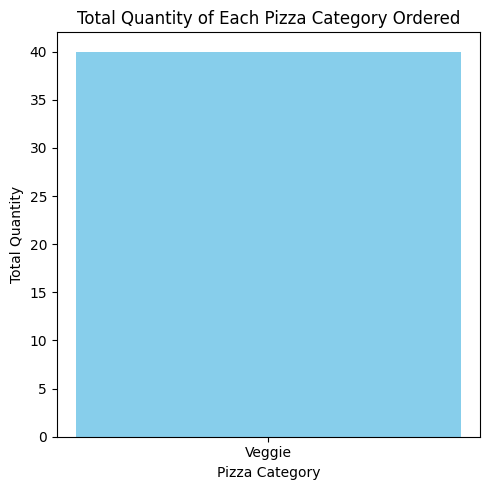

In [28]:
# Finding the total quantity of each pizza category ordered.

query_total_quantity_per_category = """
SELECT 
    pizza_types.category, 
    SUM(order_details.quantity) AS quantity
FROM 
    pizza_types
JOIN 
    pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN 
    order_details ON order_details.pizza_id = pizzas.pizza_id
GROUP BY pizza_types.category
ORDER BY quantity DESC;
"""

# Execute the query
cursor.execute(query_total_quantity_per_category)
total_quantity_per_category = cursor.fetchall()
df_total_quantity = pd.DataFrame(total_quantity_per_category, columns=['Category Name', 'Total Quantity'])
print(df_total_quantity)


# Bar chart for total quantity of each pizza category
plt.figure(figsize=(5, 5))
plt.bar(df_total_quantity['Category Name'], df_total_quantity['Total Quantity'], color='skyblue')
plt.title('Total Quantity of Each Pizza Category Ordered')
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# Line Chart for Distribution of Orders by Hour of the Day

   Order Hour  Total Orders
0          11             2
1          12             7
2          13            10
3          14             7
4          15             7
5          16             4
6          17             8
7          18             5


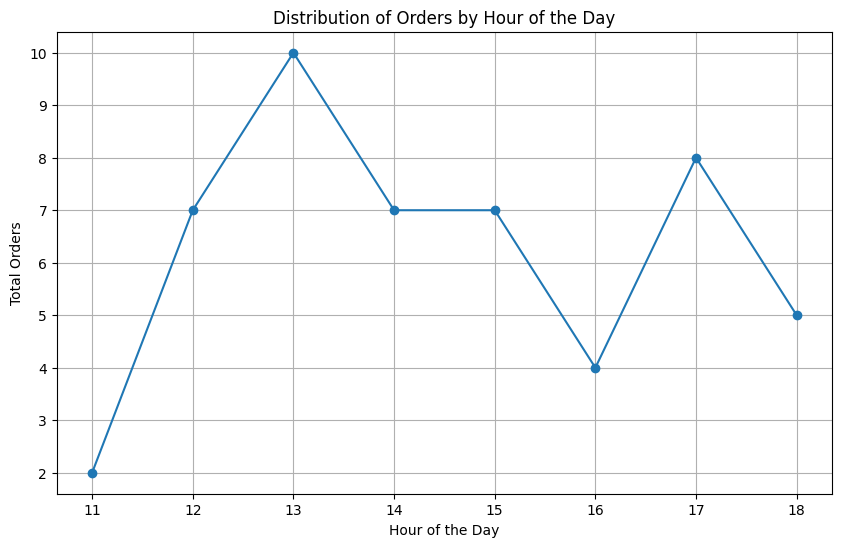

In [29]:
# Determine the distribution of orders by hour of the day.
query_orders_by_hour = """
SELECT 
    HOUR(order_time) AS hour, COUNT(order_id) AS order_count
FROM 
    orders
GROUP BY HOUR(order_time);
"""

# Execute the query
cursor.execute(query_orders_by_hour)
orders_by_hour = cursor.fetchall()
df_orders_by_hour = pd.DataFrame(orders_by_hour, columns=['Order Hour', 'Total Orders'])
print(df_orders_by_hour)

# Line chart for distribution of orders by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(df_orders_by_hour['Order Hour'], df_orders_by_hour['Total Orders'], marker='o')
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.grid()
plt.show()

The highest number of orders (10) occurs at 1:00 PM (13:00), suggesting a peak in demand during lunchtime.

# Pie Chart for Category - Wise distribution of pizzas.

  Category Name  Total Pizzas Ordered
0        Veggie                    22
1       Supreme                    13
2       Classic                    13


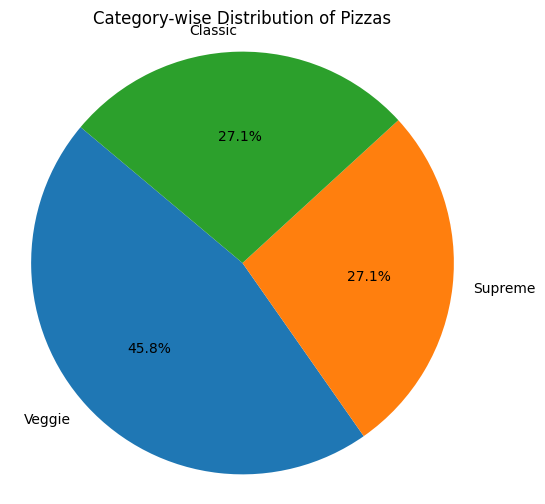

In [30]:
# Find the category-wise distribution of pizzas.

query_category_distribution = """
SELECT category, count(name) FROM pizza_types
GROUP BY category;
"""

# Execute the query
cursor.execute(query_category_distribution)
category_distribution = cursor.fetchall()
df_category_distribution = pd.DataFrame(category_distribution, columns=['Category Name', 'Total Pizzas Ordered'])
print(df_category_distribution)


# Pie chart for category-wise distribution of pizzas
plt.figure(figsize=(6, 6))
plt.pie(df_category_distribution['Total Pizzas Ordered'], labels=df_category_distribution['Category Name'], autopct='%1.1f%%', startangle=140)
plt.title('Category-wise Distribution of Pizzas')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

The Veggie category is the most popular, making up 22 pizzas ordered, accounting for around 45.8% of the total orders.

# Grouping the orders by date and calculating the average number of pizzas ordered per day by using Scatter plot

In [31]:
# Execute query to calculate total pizzas ordered per day
query = """
    SELECT ROUND(AVG(quantity), 0) AS avg_pizza_ordered_per_day
    FROM (SELECT orders.order_date, SUM(order_details.quantity) AS quantity
    FROM orders
    JOIN order_details ON orders.order_id = order_details.order_id
    GROUP BY orders.order_date) AS order_quantity;
"""

# Fetch the results
query = cursor.fetchall()

# Prepare data for analysis
order_dates = [row[0] for row in total_pizza_orders_per_day]  # List of order dates
total_quantities = [row[1] for row in total_pizza_orders_per_day]  # List of total quantities

# Calculate the average pizzas ordered per day
avg_pizzas_per_day = sum(total_quantities) / len(total_quantities) if total_quantities else 0

# Print the average pizzas ordered per day
print(f'Average Number of Pizzas Ordered per Day: {avg_pizzas_per_day:.2f}')

# Scatter plot for total pizzas ordered per day
plt.figure(figsize=(8, 6))
plt.scatter(order_dates, total_quantities, color='green', marker='o')  # Corrected variable name
plt.title('Total Pizzas Ordered Per Day')
plt.xlabel('Date')
plt.ylabel('Total Pizzas Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'total_pizza_orders_per_day' is not defined

# Bar chart for Top 3 pizza types based on revenue

In [ ]:
# Top 3 pizza types based on revenue
query_top_3_revenue = """
SELECT 
    pizza_types.name,
    SUM(order_details.quantity * pizzas.price) AS revenue
FROM 
    pizza_types
JOIN 
    pizzas ON pizzas.pizza_type_id = pizza_types.pizza_type_id
JOIN 
    order_details on order_details.pizza_id = pizzas.pizza_id
GROUP BY 
    pizza_types.name
ORDER BY
    revenue DESC LIMIT 3;
"""

cursor.execute(query_top_3_revenue)
top_3_revenue = cursor.fetchall()
df_top_3_revenue = pd.DataFrame(top_3_revenue, columns=['Pizza Name', 'Total Revenue'])
print(df_top_3_revenue)

# Bar chart for top 3 pizza types based on revenue
plt.figure(figsize=(6, 6))
sns.barplot(x='Pizza Name', y='Total Revenue', data=df_top_3_revenue, palette='coolwarm')
plt.title('Top 3 Most Ordered Pizza Types Based on Revenue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CONCLUSION

The analysis of the pizza sales data reveals valuable insights into customer preferences, revenue generation, and operational efficiency. Key findings indicate a strong demand for vegetarian options, with the Italian Vegetables Pizza emerging as the top performer in terms of orders. Furthermore, the popularity of larger pizza sizes suggests that marketing efforts should emphasize family and group dining. The absence of orders from certain categories highlights potential gaps in the menu that could be addressed to cater to a broader audience. Additionally, the distribution of orders by hour underscores the importance of targeted promotions during peak times. By leveraging these insights, the pizza restaurant can enhance its menu offerings, optimize pricing strategies, and improve overall customer satisfaction, ultimately driving higher sales and profitability.

# RECOMMENDATIONS

1) Expand Vegetarian Options: Introduce more vegetarian pizzas to attract a wider customer base.

2) Promote Best-Sellers: Use targeted marketing for top-selling pizzas to increase visibility and sales.

3) Offer Combo Deals: Create combo meals to encourage higher average order values, especially for families.

4) Seasonal Specials: Launch limited-time offers based on customer preferences and trends.

5) Optimize Pricing: Analyze pricing strategies to find optimal price points for different pizza types.

6) Customer Feedback: Implement a feedback system to gather insights on customer preferences.

7) Loyalty Program: Develop a rewards program to encourage repeat business.

8) Time-Based Promotions: Offer discounts during off-peak hours to boost sales.

9) Leverage Data Analytics: Continuously analyze sales data to inform menu and marketing decisions.

10) Staff Training on Upselling: Train staff to upsell items to enhance customer experience and increase sales.